In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from vega_datasets import data

import warnings
warnings.filterwarnings('ignore')

## sf_temps() 

In [2]:
df = data.sf_temps()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
temps = df.set_index('date').sort_index()
temps

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
daily_temps = temps.resample('D').mean()
daily_temps

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


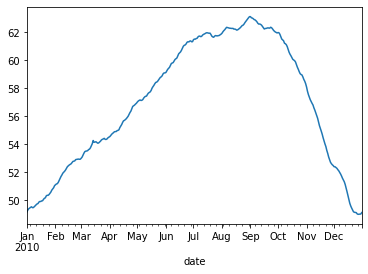

In [7]:
daily_temps.temp.plot();

### 2. Write the code necessary to visualize the minimum temperature over time.

In [8]:
min_temps = temps.resample('D').min()

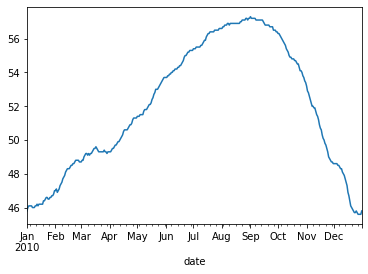

In [9]:
min_temps.temp.plot();

### 3. Write the code necessary to visualize the maximum temperature over time.

In [10]:
max_temps = temps.resample('D').max()

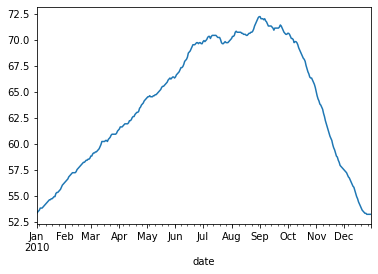

In [11]:
max_temps.temp.plot();

### 4. Which month is the coldest, on average?

In [12]:
new_df=df.copy()

In [13]:
new_df['month'] = new_df.date.dt.month_name()

In [14]:
new_df.groupby('month').mean().sort_values('temp').head(1)

,temp
month,
January,49.98414


### 5. Which month has the highest average temperature?

In [15]:
new_df.groupby('month').mean().sort_values('temp', ascending=False).head(1)

,temp
month,
September,62.487083


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [46]:
daily_temp = df.set_index('date').sort_index().resample('D').agg(['min','max'] ).temp

In [48]:
daily_temp['temp_diff'] = daily_temp['max'] - daily_temp['min']

In [51]:
daily_temp['month'] = daily_temp.index.month_name()

In [52]:
daily_temp.groupby('month').max().sort_values('temp_diff', ascending=False).head(1)

,min,max,temp_diff
month,,,
August,57.2,72.2,15.0


### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [16]:
day_viz = temps.resample('D').temp.agg(['min', 'max', 'mean'])

In [17]:
day_viz

,min,max,mean
date,,,
2010-01-01,45.8,53.3,49.170833
2010-01-02,46.0,53.4,49.304167
2010-01-03,46.1,53.5,49.391667
2010-01-04,46.1,53.6,49.445833
2010-01-05,46.1,53.8,49.491667
...,...,...,...
2010-12-27,45.6,53.2,48.991667
2010-12-28,45.6,53.2,49.000000
2010-12-29,45.6,53.2,49.012500


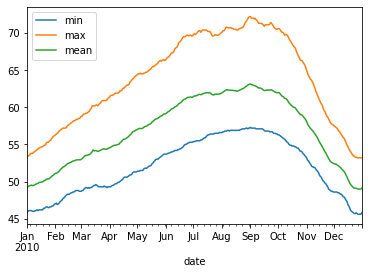

In [55]:
day_viz['min'].plot()
day_viz['max'].plot()
day_viz['mean'].plot()
plt.legend()
plt.show()

## data.seattle_weather()

In [56]:
seattle_weather = data.seattle_weather()

In [57]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [62]:
seattle_weather = seattle_weather.set_index('date').sort_index()

### 1. Which year and month combination has the highest amount of precipitation?

In [63]:
max_precip = seattle_weather.resample('M').max()

In [64]:
max_precip[max_precip.precipitation.max()==max_precip.precipitation]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-03-31,55.9,20.6,10.6,5.7,sun


In [69]:
seattle_weather1 = seattle_weather.copy()

In [70]:
seattle_weather1['year_month'] = seattle_weather1.index.strftime('%Y-%b')

In [73]:
seattle_weather1.groupby('year_month').sum().sort_values('precipitation', ascending=False).precipitation.head(1)


year_month
2015-Dec    284.5
Name: precipitation, dtype: float64

### 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

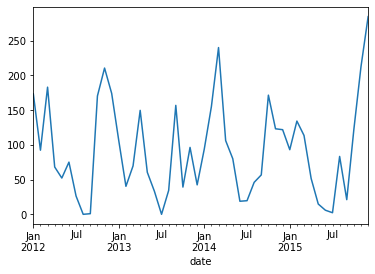

In [75]:
seattle_weather.resample('M').sum().precipitation.plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

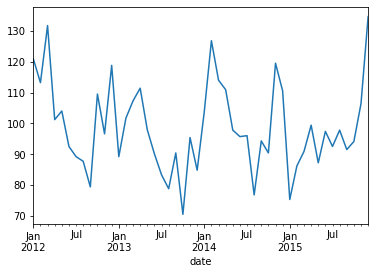

In [76]:
seattle_weather.resample('M').sum().wind.plot()

### 4. Which year-month combination is the windiest?

In [77]:
seattle_weather1.groupby('year_month').sum().sort_values('wind', ascending=False).wind.head(1)


year_month
2015-Dec    134.6
Name: wind, dtype: float64

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [80]:
seattle_weather['sunny_day'] = seattle_weather.weather=='sun'

In [81]:
seattle_weather['year'] = seattle_weather.index.year

In [83]:
seattle_weather.groupby('year').sum().sunny_day.sort_values(ascending=False).head(1)



year
2014    211
Name: sunny_day, dtype: int64

### 6. In which month does it rain the most?

In [90]:
seattle_weather['month'] = seattle_weather.index.month_name()

In [91]:
seattle_weather['rainy_day'] = seattle_weather.weather=='rain'

In [92]:
seattle_weather.groupby('month').sum().rainy_day.sort_values(ascending=False).head(1)


month
February    40
Name: rainy_day, dtype: int64

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [93]:
seattle_weather['has_rain'] = seattle_weather.precipitation > 0

In [94]:
seattle_weather.groupby('month').sum().has_rain.sort_values(ascending=False).head(1)


month
December    81
Name: has_rain, dtype: int64

## data.flights_20k()

In [29]:
flights = data.flights_20k()

In [30]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [31]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


### 1. Convert any negative delays to 0.

In [32]:
flights['delay'].mask(flights['delay']<0,0, inplace=True)

In [33]:
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [34]:
month_delay = flights.reset_index().set_index('date').resample('M').mean()

In [35]:
month_delay

,index,delay,distance
date,,,
2001-01-31,9971.124558,11.301592,500.391952
2001-02-28,10070.690217,12.306106,511.156170
2001-03-31,9963.168534,9.875287,504.712069


### 2. Which hour of the day has the highest average delay?

In [96]:
flights = flights.reset_index().set_index('date')

In [97]:
flights['hour'] = flights.index.hour

In [101]:
flights.groupby('hour').mean().sort_values('delay', ascending=False).delay.head(1)

hour
3    302.5
Name: delay, dtype: float64

### 3. Does the day of the week make a difference in the delay amount?

In [38]:
flights['weekday'] = flights.date.dt.day_name()
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

In [39]:
weekday = flights.groupby('weekday').mean().reindex(days)

<AxesSubplot:xlabel='weekday'>

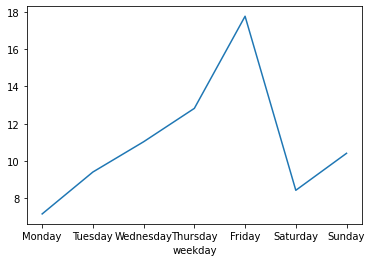

In [40]:
weekday.delay.plot()

Fridays are more likely to have longer delays.

### 4. Does the month make a difference in the delay amount?

In [41]:
flights['month'] = flights.date.dt.month

In [42]:
delays_by_month = flights.groupby('month').mean()

<AxesSubplot:xlabel='month'>

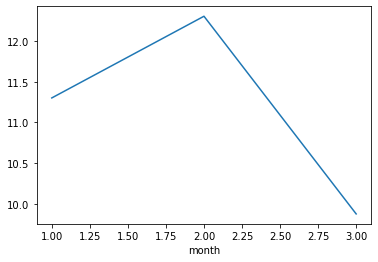

In [43]:
delays_by_month.delay.plot()

February has more delays than January and March